In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
delivery = pd.read_csv('A:\ExcelR Assi\Assi4....Simple regression\delivery_time.csv')
df = pd.DataFrame(delivery)

In [3]:
df.rename(columns={'Sorting Time':'STime'}, inplace=True)

In [4]:
df.rename(columns={'Delivery Time':'DTime'}, inplace=True)

In [5]:
df

,DTime,STime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [6]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DTime   21 non-null     float64
 1   STime   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


#### Correlation

In [7]:
delivery.corr()

,DTime,STime
DTime,1.000000,0.825997
STime,0.825997,1.000000


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DTime', ylabel='Density'>

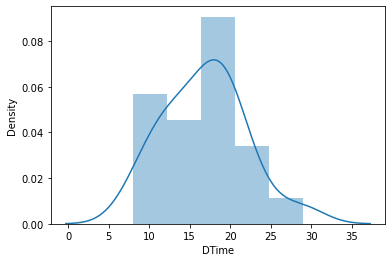

In [8]:
sns.distplot(df['DTime'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='STime', ylabel='Density'>

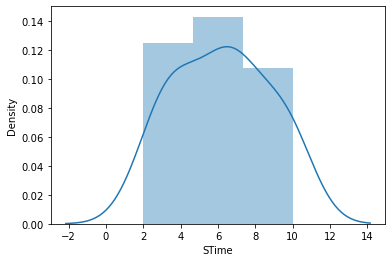

In [9]:
sns.distplot(df['STime'])

#### Fitting a linear regression model


In [10]:
import statsmodels.formula.api as smf

In [11]:
model = smf.ols("STime~DTime",data = df).fit()

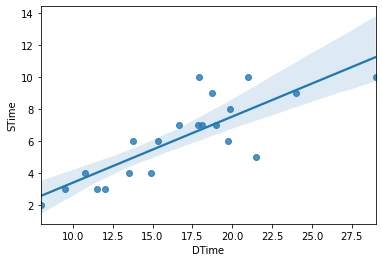

In [12]:
sns.regplot(x="DTime", y="STime", data=df);

In [13]:
#Coefficients
model.params

Intercept   -0.756673
DTime        0.413744
dtype: float64

In [14]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept   -0.667290
DTime        6.387447
dtype: float64 
 Intercept    0.512611
DTime        0.000004
dtype: float64


In [15]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

### Predicitng for new data point

In [16]:
newdata=pd.DataFrame(df.DTime)

In [17]:
model.predict(newdata)

0      7.931943
1      4.828866
2      7.414763
3      9.173174
4     11.241892
5      5.594291
6      7.104456
7      3.173891
8      6.649338
9      7.001020
10     7.447863
11     3.691071
12     6.144570
13     4.001378
14     4.220662
15     5.399832
16     4.932302
17     6.736224
18     2.553276
19     6.620376
20     8.138815
dtype: float64